In [1]:
%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [2]:
%%R
library(readr)
library(dplyr)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [0]:
%%R
df <- read_csv('2008.zip', col_types = cols_only(DayOfWeek = col_integer(), DayofMonth = col_integer(), Month = col_integer(), Cancelled = col_integer(), Year = col_integer(), FlightNum = col_integer(), Distance = col_double(), UniqueCarrier = col_character(), CancellationCode = col_character(), Origin = col_character(), Dest = col_character(), ArrDelay = col_integer(), DepDelay=col_integer(), CarrierDelay=col_integer(), WeatherDelay = col_integer(), NASDelay=col_integer(), SecurityDelay = col_integer(), LateAircraftDelay=col_integer(), DepTime=col_integer()))


In [5]:
%%R
head(df)

# A tibble: 6 x 19
   Year Month DayofMonth DayOfWeek DepTime UniqueCarrier FlightNum ArrDelay
  <int> <int>      <int>     <int>   <int> <chr>             <int>    <int>
1  2008     1          3         4    2003 WN                  335      -14
2  2008     1          3         4     754 WN                 3231        2
3  2008     1          3         4     628 WN                  448       14
4  2008     1          3         4     926 WN                 1746       -6
5  2008     1          3         4    1829 WN                 3920       34
6  2008     1          3         4    1940 WN                  378       11
# … with 11 more variables: DepDelay <int>, Origin <chr>, Dest <chr>,
#   Distance <dbl>, Cancelled <int>, CancellationCode <chr>,
#   CarrierDelay <int>, WeatherDelay <int>, NASDelay <int>,
#   SecurityDelay <int>, LateAircraftDelay <int>


1. Find top-10 carriers in terms of the number of completed flights (UniqueCarrier column)?

Which of the listed below is not in your top-10 list?

DL
AA
OO
EV

In [6]:
%%R
top <- df
sort(table(df['UniqueCarrier']), decreasing=TRUE)[1:10]


     WN      AA      OO      MQ      US      DL      UA      XE      NW      CO 
1201754  604885  567159  490693  453589  451931  449515  374510  347652  298455 


**Answer: EV**

**2. Plot distributions of flight cancellation reasons (CancellationCode).**

What is the most frequent reason for flight cancellation? (Use this link to translate codes into reasons)

carrier; weather conditions; National Air System; security reasons

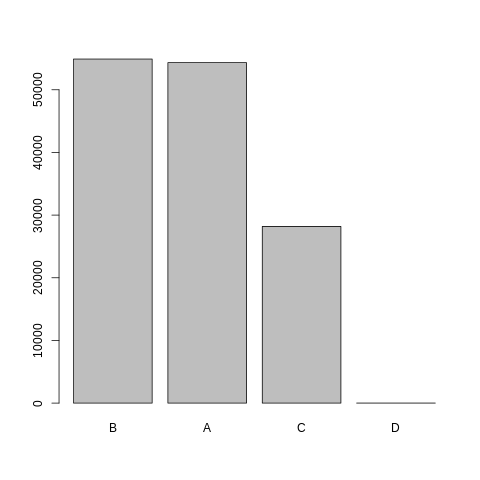

In [8]:
%%R
cancels = sort(table(df['CancellationCode']), decreasing=TRUE)
barplot(cancels)

**Answer: weather conditions(B)**

**3.Which route is the most frequent, in terms of the number of flights?**
(Take a look at 'Origin' and 'Dest' features. Consider A->B and B->A directions as different routes)

New-York – Washington
 San-Francisco – Los-Angeles
  San-Jose – Dallas
   New-York – San-Francisco

In [9]:
%%R
frequent <-df
frequent %>% group_by(Origin, Dest) %>% summarise(n=n()) %>% arrange(-n) %>% .[1,]

# A tibble: 1 x 3
# Groups:   Origin [1]
  Origin Dest      n
  <chr>  <chr> <int>
1 SFO    LAX   13788


**Answer: San-Francisco – Los-Angeles**

**4.Find top-5 delayed routes** (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.

449 539 549 668

In [10]:
%%R
delayed <-df
filter(delayed, DepDelay>0) %>% group_by(Origin, Dest) %>% summarize(n = n(), w = length(which(WeatherDelay > 0))) %>% arrange(-n) %>% .[1:5, 'w'] %>% sum()

[1] 668


**Answer: 668**

**5.Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.**
Choose all correct statements:

Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).

 Flights are uniformly distributed within time interval [0-23].
 
  In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

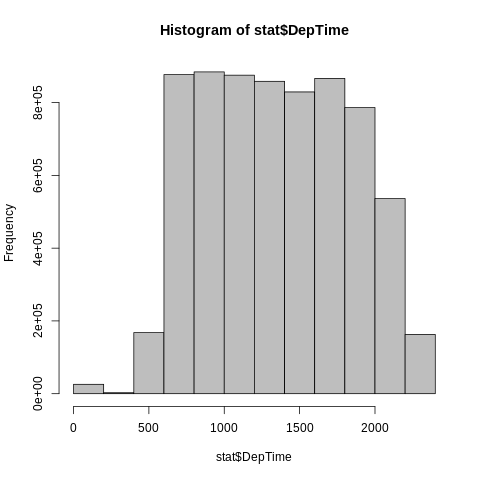

In [13]:
%%R
stat = df[!is.na(df['DepTime']), 'DepTime']
hist(stat$DepTime, breaks = 10, col='grey')

**Answer: True is last statement**

**6.Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

Choose all correct statements:

The number of flights during weekends is less than during weekdays (working days).

The lowest number of flights is on Sunday.

There are less flights during winter than during summer.

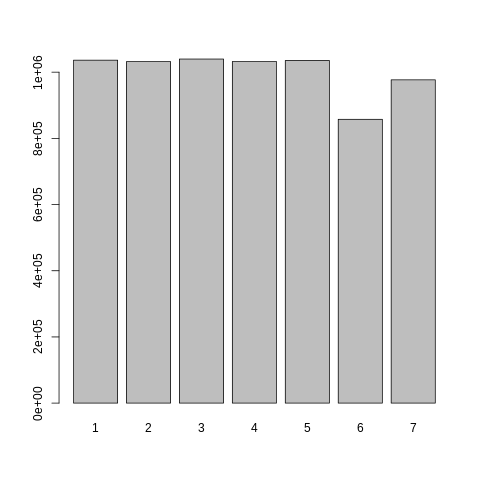

In [14]:
%%R
barplot(table(df['DayOfWeek']))

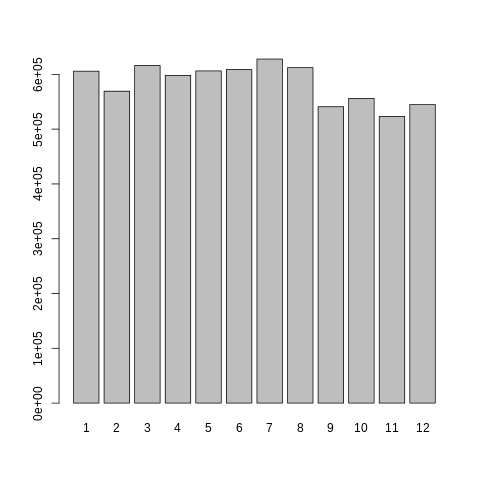

In [15]:
%%R
barplot(table(df['Month']))

**Answer: True is 1st and last statement**

**7.Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**
Choose all correct statements:

December has the highest rate of cancellations due to weather. 

The highest rate of cancellations in September is due to Security reasons.

 April's top cancellation reason is carriers. 
 
 Flights cancellations due to National Air System are more frequent than those due to carriers.

In [16]:
%%R
statem <- df %>% filter(!is.na(CancellationCode)) %>% group_by(CancellationCode, Month) %>% summarize(n = n()) %>% arrange(-n)
statem

# A tibble: 41 x 3
# Groups:   CancellationCode [4]
   CancellationCode Month     n
   <chr>            <int> <int>
 1 B                   12 10042
 2 B                    2 10034
 3 B                    3  7520
 4 A                    4  7312
 5 B                    1  6711
 6 A                    1  6635
 7 B                    9  6478
 8 A                    2  6090
 9 A                    3  6038
10 A                    7  5292
# … with 31 more rows


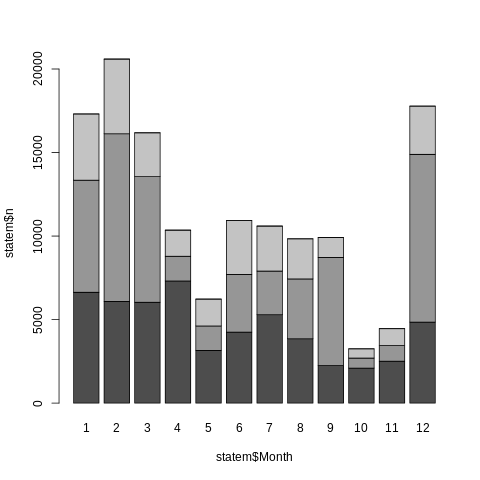

In [17]:
%%R
barplot(formula = statem$n ~ statem$CancellationCode + statem$Month)

**Answer:TFTF**

**8.Which month has the greatest number of cancellations due to Carrier?**
May January September April

In [18]:
%%R
carrier <- filter(df, CancellationCode == 'A')
carrier %>% group_by(Month, CancellationCode) %>% summarize(n = n()) %>% arrange(-n) %>% .[1,]

# A tibble: 1 x 3
# Groups:   Month [1]
  Month CancellationCode     n
  <int> <chr>            <int>
1     4 A                 7312


**Answer: April**

**9.Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question**
9E EV HA AA

In [19]:
%%R
needed <- filter(df, Month == 4 & Cancelled == 1)
needed %>% group_by(UniqueCarrier) %>% summarize(n = n()) %>% arrange(-n) %>% .[1,]

# A tibble: 1 x 2
  UniqueCarrier     n
  <chr>         <int>
1 AA             3918


**Answer: AA**

**10. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures?**

 Leave only non-negative values of delay times ('ArrDelay', 'DepDelay'). Boxplots can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile.
 
EV OO AA AQ

In [20]:
%%R
df %>% filter(ArrDelay > 0) %>% group_by(UniqueCarrier) %>% summarize(n = median(ArrDelay)) %>% arrange(n) %>% .[1, ]

# A tibble: 1 x 2
  UniqueCarrier     n
  <chr>         <dbl>
1 AQ                5


In [21]:
%%R

df %>% filter(DepDelay > 0) %>% group_by(UniqueCarrier) %>% summarize(n = median(DepDelay)) %>% arrange(n) %>% .[1, ]

# A tibble: 1 x 2
  UniqueCarrier     n
  <chr>         <dbl>
1 AQ                7


**Answer: AQ**